In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.preprocessing import OneHotEncoder, LabelEncoder

import tensorflow as tf
import keras
from keras import layers

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [41]:
df = pd.read_csv("diabetes_prediction_dataset.csv")
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.00,0,1,never,25.19,6.60,140,0
1,Female,54.00,0,0,No Info,27.32,6.60,80,0
2,Male,28.00,0,0,never,27.32,5.70,158,0
3,Female,36.00,0,0,current,23.45,5.00,155,0
4,Male,76.00,1,1,current,20.14,4.80,155,0


In [42]:
print(df.isnull().sum())

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


In [43]:
df['diabetes'].value_counts()

diabetes
0    91500
1     8500
Name: count, dtype: int64

<Axes: >

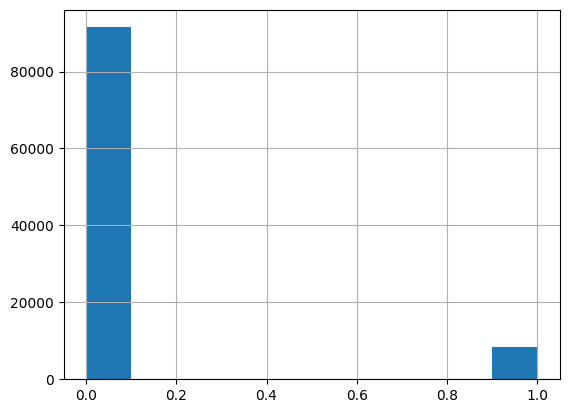

In [44]:
df['diabetes'].hist()

#### AI was used in this code cell

In [45]:
df = pd.get_dummies(df, columns=['gender', 'smoking_history'], drop_first=False)

In [46]:
df.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,gender_Other,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80.00,0,1,25.19,6.60,140,0,True,False,False,False,False,False,False,True,False
1,54.00,0,0,27.32,6.60,80,0,True,False,False,True,False,False,False,False,False
2,28.00,0,0,27.32,5.70,158,0,False,True,False,False,False,False,False,True,False
3,36.00,0,0,23.45,5.00,155,0,True,False,False,False,True,False,False,False,False
4,76.00,1,1,20.14,4.80,155,0,False,True,False,False,True,False,False,False,False


#### LabelEncoder

In [47]:
from sklearn.preprocessing import LabelEncoder

variables = [
   'gender_Female',
   'gender_Male',
   'gender_Other',
   'smoking_history_No Info',
   'smoking_history_current',
   'smoking_history_ever',
   'smoking_history_former',
   'smoking_history_never',
   'smoking_history_not current'
]

encoder = LabelEncoder()
df[variables] = df[variables].apply(encoder.fit_transform)

#### Correlation

In [48]:
corr_matrix = df.corr()['diabetes']
corr_matrix.sort_values(ascending=False)

diabetes                       1.00
blood_glucose_level            0.42
HbA1c_level                    0.40
age                            0.26
bmi                            0.21
hypertension                   0.20
heart_disease                  0.17
smoking_history_former         0.10
gender_Male                    0.04
smoking_history_never          0.03
smoking_history_ever           0.02
smoking_history_not current    0.02
smoking_history_current        0.02
gender_Other                  -0.00
gender_Female                 -0.04
smoking_history_No Info       -0.12
Name: diabetes, dtype: float64

## NEW COMPARISON ## - age vs diabetes


<Figure size 1000x600 with 0 Axes>

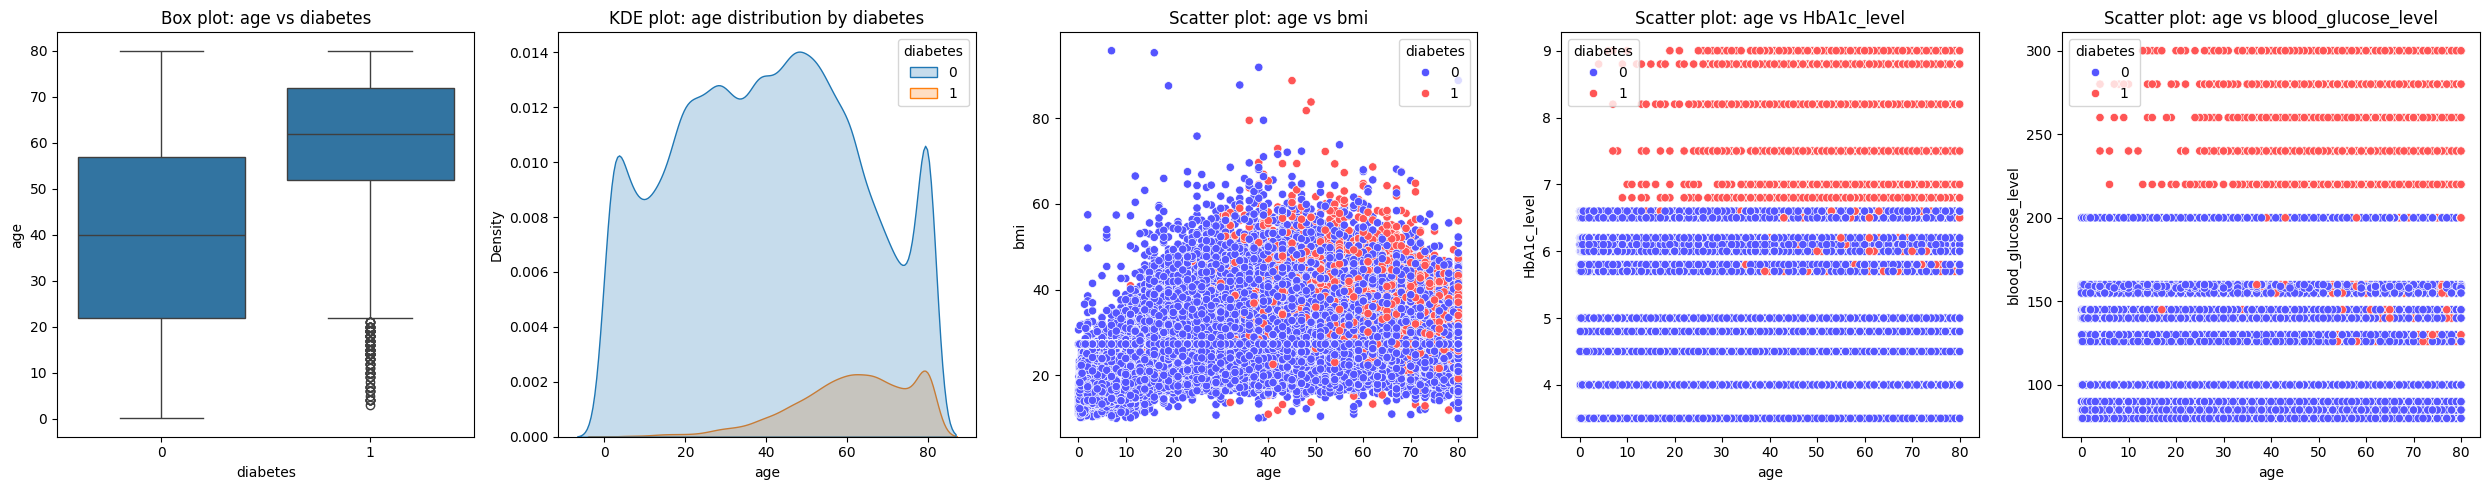

## NEW COMPARISON ## - bmi vs diabetes


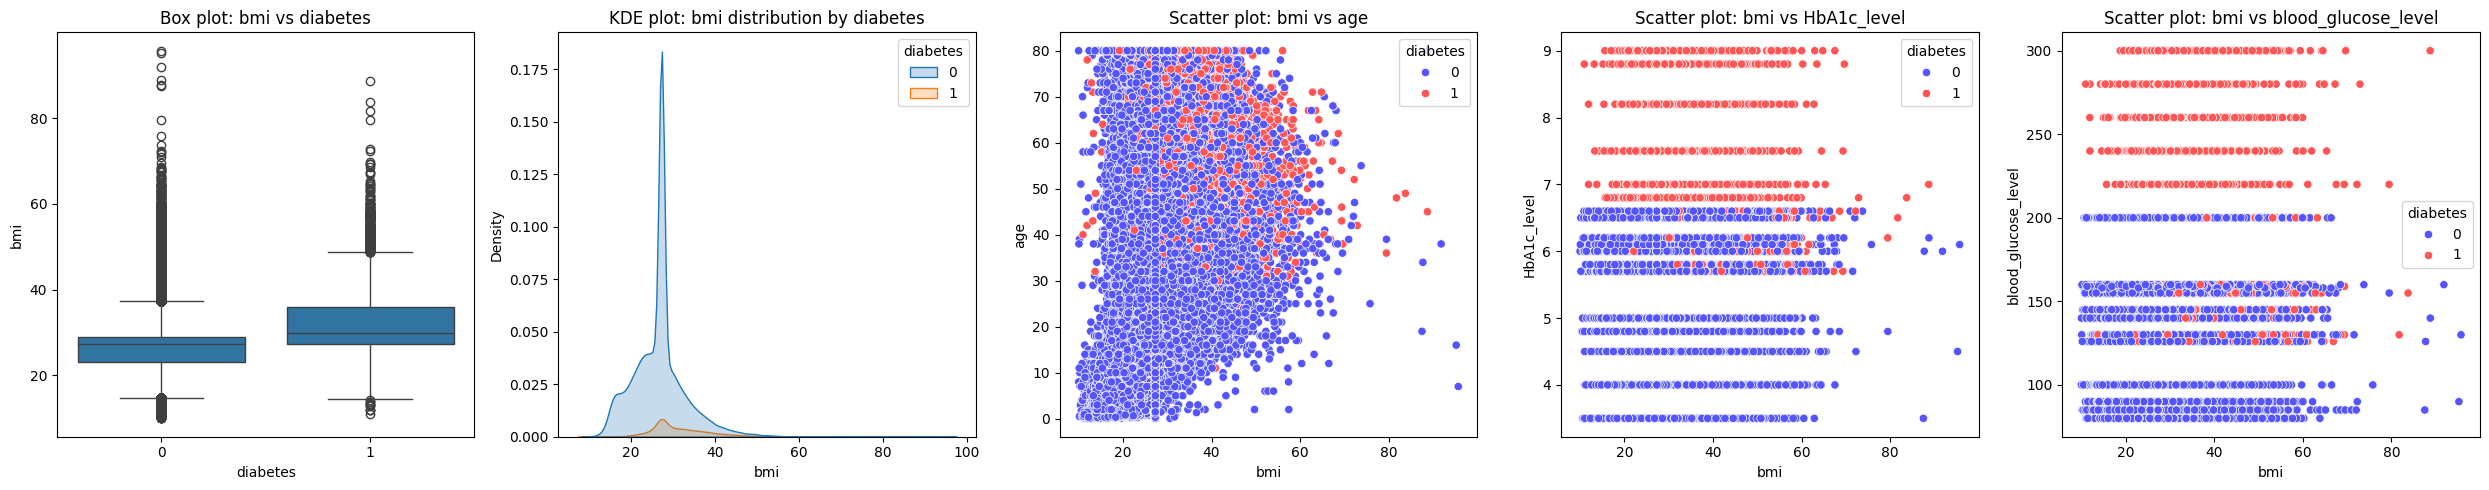

## NEW COMPARISON ## - HbA1c_level vs diabetes


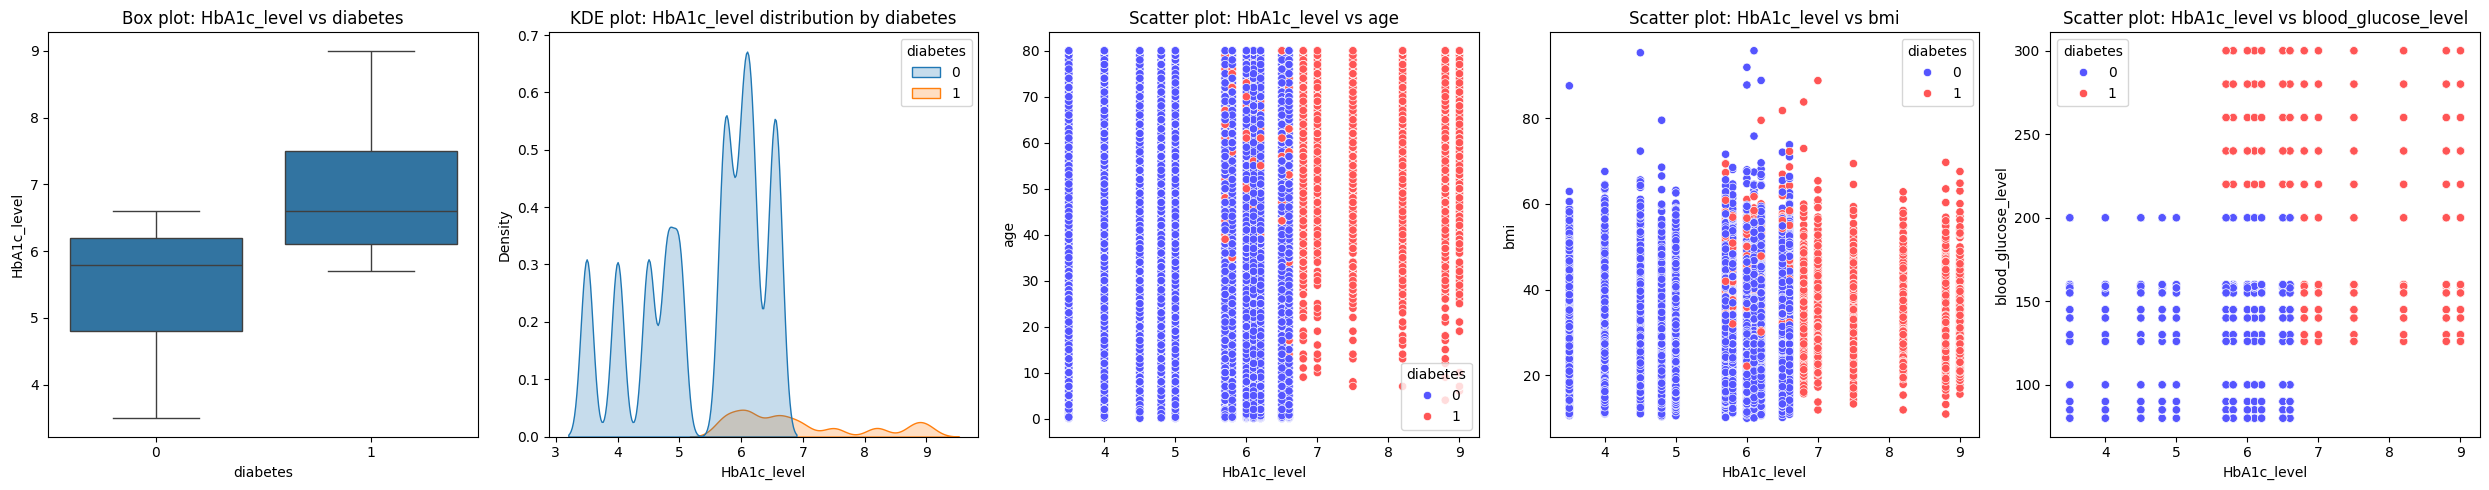

## NEW COMPARISON ## - blood_glucose_level vs diabetes


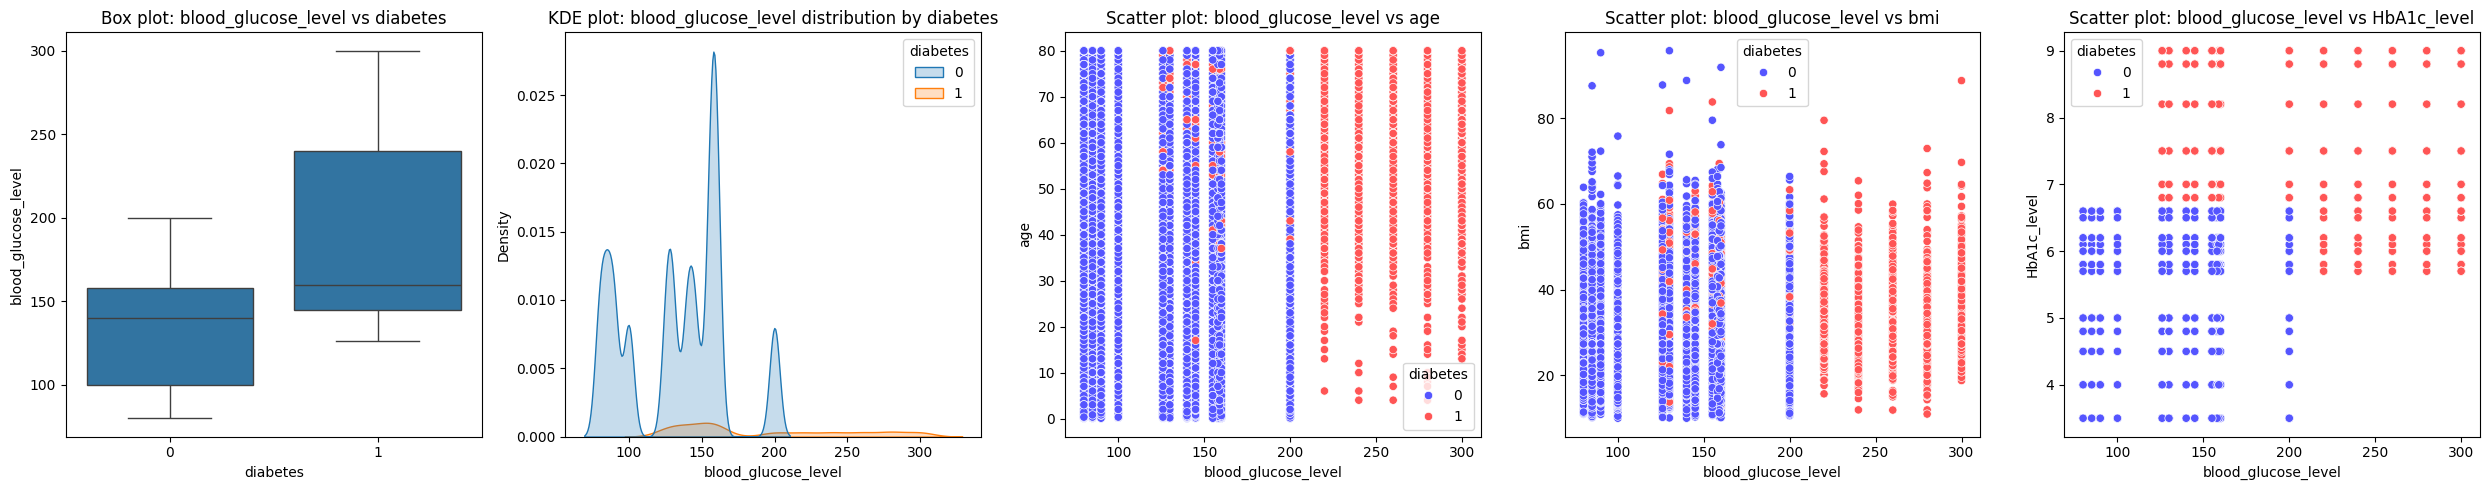

In [49]:
suspected_columns = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
target_variable = 'diabetes'  

plt.figure(figsize=(10, 6))

for feature in suspected_columns:
    print(f"## NEW COMPARISON ## - {feature} vs {target_variable}")
    num_other_features = len([col for col in suspected_columns if col != feature])
    
    fig, axes = plt.subplots(1, 2 + num_other_features, figsize=(5 * (2 + num_other_features), 5))
    
    sns.boxplot(x=target_variable, y=feature, data=df, ax=axes[0])
    axes[0].set_title(f'Box plot: {feature} vs {target_variable}')
    
    sns.kdeplot(x=feature, hue=target_variable, data=df, fill=True, ax=axes[1])
    axes[1].set_title(f'KDE plot: {feature} distribution by {target_variable}')
    
    for i, other_feature in enumerate([col for col in suspected_columns if col != feature]):
        sns.scatterplot(x=feature, palette="seismic", y=other_feature, hue=target_variable, data=df, ax=axes[i + 2])
        axes[i + 2].set_title(f'Scatter plot: {feature} vs {other_feature}')
    
    plt.tight_layout()
    plt.show()


In [50]:
df.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,gender_Other,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80.00,0,1,25.19,6.60,140,0,1,0,0,0,0,0,0,1,0
1,54.00,0,0,27.32,6.60,80,0,1,0,0,1,0,0,0,0,0
2,28.00,0,0,27.32,5.70,158,0,0,1,0,0,0,0,0,1,0
3,36.00,0,0,23.45,5.00,155,0,1,0,0,0,1,0,0,0,0
4,76.00,1,1,20.14,4.80,155,0,0,1,0,0,1,0,0,0,0


In [53]:
df['diabetes'] = df['diabetes'].replace({
    0: "0: Negative",
    1: "1: Positive"
})

In [54]:
X = df.drop("diabetes", axis=1)

y_temp = df['diabetes']

le = LabelEncoder()
y_enc = le.fit_transform(y_temp)

y = tf.keras.utils.to_categorical(y_enc)

categories = list(le.classes_)
categories

['Negative', 'Positive']

#### Chi²-Test

In [55]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X_cat = X.astype(int)
X_cat = X_cat.clip(lower=0)

chi_2_features = SelectKBest(chi2, k=len(X_cat.columns))

best_features = chi_2_features.fit(X_cat,y.astype(int))

pd.options.display.float_format = '{:.2f}'.format

df_features = pd.DataFrame(best_features.scores_)
df_columns = pd.DataFrame(X_cat.columns)
f_scores = pd.concat([df_columns,df_features],axis=1)
f_scores.columns = ['Features','Score']
f_scores.sort_values(by='Score',ascending=False)

,Features,Score
5,blood_glucose_level,211290.67
0,age,80682.59
3,bmi,7485.53
1,hypertension,3620.49
4,HbA1c_level,3544.14
2,heart_disease,2832.76
9,smoking_history_No Info,907.97
12,smoking_history_former,869.11
7,gender_Male,83.10
6,gender_Female,58.45


#### Train/Test/Validation-Split

In [56]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5)

In [57]:
df.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,gender_Other,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80.00,0,1,25.19,6.60,140,Negative,1,0,0,0,0,0,0,1,0
1,54.00,0,0,27.32,6.60,80,Negative,1,0,0,1,0,0,0,0,0
2,28.00,0,0,27.32,5.70,158,Negative,0,1,0,0,0,0,0,1,0
3,36.00,0,0,23.45,5.00,155,Negative,1,0,0,0,1,0,0,0,0
4,76.00,1,1,20.14,4.80,155,Negative,0,1,0,0,1,0,0,0,0


#### Create the neural network

In [58]:
model = keras.Sequential(
    [
        layers.BatchNormalization(input_shape=(len(X.columns),)),
        layers.Dense(64, activation="relu", kernel_regularizer=keras.regularizers.l1(l1=0.1)),
        layers.Dense(32, activation="relu"),
        layers.Dense(16, activation="relu"),
        layers.Dense(len(categories), activation="softmax")
    ]
)

model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

d:\5. Semester\Deep Learning\DL-projects\venv312\Lib\site-packages\keras\src\layers\normalization\batch_normalization.py:142: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization_2           │ (None, 15)             │            60 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 2)              │            34 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,726 (14.55 KB)

 Trainable params: 3,696 (14.44 KB)

 Non-trainable params: 30 (120.00 B)

#### Training the neural network

In [59]:
model.fit(x=X_train, y=y_train, epochs=20, validation_data=(X_val, y_val))


Epoch 1/20
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9470 - loss: 0.7465 - val_accuracy: 0.9563 - val_loss: 0.1728
Epoch 2/20
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9524 - loss: 0.1719 - val_accuracy: 0.9589 - val_loss: 0.1547
Epoch 3/20
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9507 - loss: 0.1651 - val_accuracy: 0.9589 - val_loss: 0.1535
Epoch 4/20
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9517 - loss: 0.1601 - val_accuracy: 0.9599 - val_loss: 0.1395
Epoch 5/20
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9521 - loss: 0.1574 - val_accuracy: 0.9607 - val_loss: 0.1376
Epoch 6/20
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9528 - loss: 0.1549 - val_accuracy: 0.9591 - val_loss: 0.1378
Epoch 7/20
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9527 - loss: 0.1537 - val_accuracy: 0.9612 - val_loss: 0.1360
Epoch 8/20
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9520 - loss: 0.1544 - 

<Axes: >

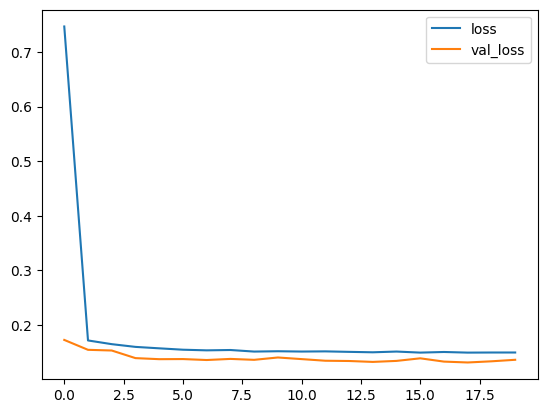

In [60]:
loss_df = pd.DataFrame(model.history.history)
loss_df[['loss', 'val_loss']].plot()

<Axes: >

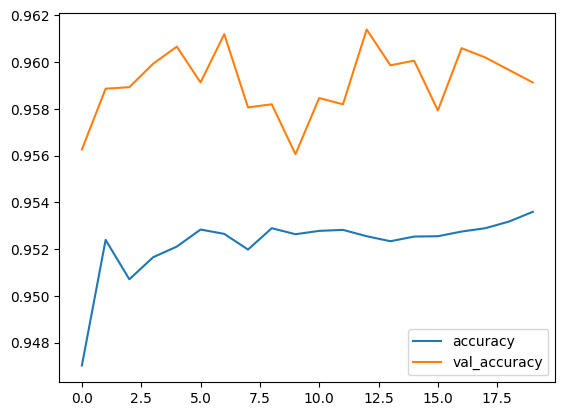

In [61]:
loss_df[['accuracy', 'val_accuracy']].plot()

In [62]:
print("Test data evaluation:")
print(model.evaluate(X_test, y_test, verbose=0))
print("\nTrain data evaluation:")
print(model.evaluate(X_train, y_train, verbose=0))

Test data evaluation:
[0.13781127333641052, 0.9582666754722595]

Train data evaluation:
[0.14010076224803925, 0.9580857157707214]


In [63]:
test_predictions = model.predict(X_test)
test_predictions = np.argmax(test_predictions, axis=1)

y_test = np.argmax(y_test, axis=1)

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


<Axes: >

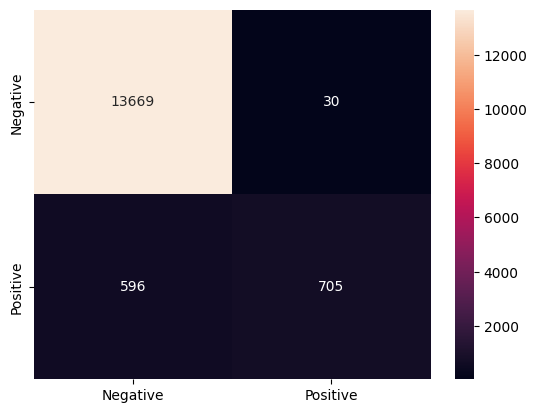

In [64]:
sns.heatmap(confusion_matrix(y_test, test_predictions), annot=True, fmt='g', 
            xticklabels=categories, yticklabels=categories)

In [65]:
print(classification_report(y_test, test_predictions, target_names=categories))

acc = accuracy_score(y_test, test_predictions)
print("\nModel overall accuracy: {:.2f}%".format(acc * 100))


              precision    recall  f1-score   support

    Negative       0.96      1.00      0.98     13699
    Positive       0.96      0.54      0.69      1301

    accuracy                           0.96     15000
   macro avg       0.96      0.77      0.84     15000
weighted avg       0.96      0.96      0.95     15000


Model overall accuracy: 95.83%


In [66]:
roc_auc_score(y, model.predict(X), multi_class="ovr")

3125/3125 ━━━━━━━━━━━━━━━━━━━━ 3s 823us/step


0.9578043429765348

In [67]:
X.columns

Index(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'gender_Female', 'gender_Male', 'gender_Other',
       'smoking_history_No Info', 'smoking_history_current',
       'smoking_history_ever', 'smoking_history_former',
       'smoking_history_never', 'smoking_history_not current'],
      dtype='object')

In [68]:
df.head(3)

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,gender_Other,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80.00,0,1,25.19,6.60,140,Negative,1,0,0,0,0,0,0,1,0
1,54.00,0,0,27.32,6.60,80,Negative,1,0,0,1,0,0,0,0,0
2,28.00,0,0,27.32,5.70,158,Negative,0,1,0,0,0,0,0,1,0


In [69]:
tester_row = {
    'age': 45,
    'hypertension': 1,
    'heart_disease': 0,
    'bmi': 32.5,
    'HbA1c_level': 6.8,
    'blood_glucose_level': 155,
    'gender_Female': 0,
    'gender_Male': 1,        
    'gender_Other': 0,
    'smoking_history_No Info': 0,
    'smoking_history_current': 0,
    'smoking_history_ever': 1,
    'smoking_history_former': 0,
    'smoking_history_never': 0,
    'smoking_history_not current': 0
}

tester_row = pd.DataFrame([tester_row])
result = model.predict(tester_row)[0]
result_text = categories[np.argmax(result)]

np.set_printoptions(precision=9, suppress=True)

# 0 cheapest, 3 most expensive
print(f"Predicted diagnosis: {result_text}")
print()
print("Probabilities by class:")
print(categories)
print(result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Predicted diagnosis: Negative

Probabilities by class:
['Negative', 'Positive']
[0.7980134 0.2019866]


In the initial training phase, the model achieved a very high overall accuracy of around 97%. However, because of the strong class imbalance in the dataset (91,500 non-diabetes cases compared to only 8,500 diabetes cases), the results were biased towards the majority class. While precision and recall for the non-diabetes class were excellent, the recall for the diabetes class was only about 0.66, meaning that many true diabetes cases were missed. After applying class weights during training, the model’s behavior changed significantly. Recall for diabetes increased to approximately 0.90, which indicates that the model was able to identify almost all positive cases. At the same time, precision for diabetes dropped to about 0.49, showing that more false positives were generated, and the overall accuracy decreased to around 91%. This trade-off is nevertheless important and beneficial: without class weights the model achieved high accuracy but failed to capture many diabetes cases, whereas with class weights it became more sensitive and succeeded in identifying the majority of them. In a medical context, this is the more desirable outcome, since false negatives (undiagnosed diabetes patients) are far more critical than false positives. 